#Part A: Image Reading

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# ----------- 讀取 RAW 圖片 -----------
def read_raw(filename, width=512, height=512):
    """讀取 raw 格式影像 (512x512, grayscale)"""
    with open(filename, "rb") as f:
        data = np.frombuffer(f.read(), dtype=np.uint8)
    img = data.reshape((height, width))
    return img

# ----------- 讀取 BMP/JPG 圖片 -----------
def read_bmp(filename):
    """讀取 bmp/jpg/png 影像，轉為灰階 numpy array"""
    img = Image.open(filename).convert("L")  # "L" = 灰階
    return np.array(img)

# ----------- 顯示影像 -----------
def show_image(img, title="Image"):
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

# ----------- 擷取中心 10x10 -----------
def center_patch(img, size=10):
    h, w = img.shape
    cy, cx = h // 2, w // 2
    half = size // 2
    patch = img[cy-half:cy+half, cx-half:cx+half]
    return patch


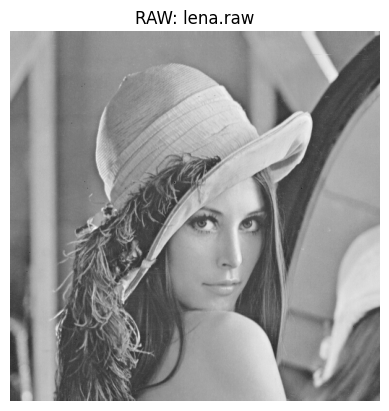

lena.raw 中心 10x10 像素值:
 [[195 195 195 192 169 135 133 137 138 148]
 [196 196 189 157 124 128 135 144 145 145]
 [196 187 149 123 127 131 135 142 142 137]
 [180 135 116 117 124 130 131 132 137 133]
 [124 102 115 116 120 126 124 120 114 111]
 [100 102 114 114 114 118 120 117 112  92]
 [101 100 113 106  98  89  90 104 101  84]
 [105  96  99  94  92  78  75  79  83  76]
 [ 92  90  90  84  79  75  71  73  72  71]
 [ 85  79  76  77  76  71  73  73  69  77]] 



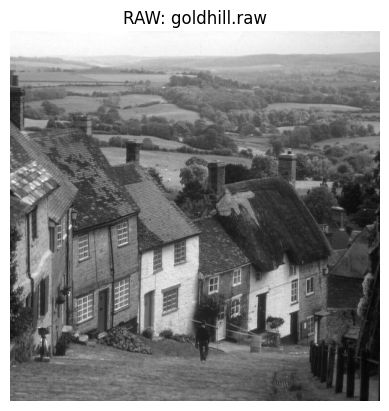

goldhill.raw 中心 10x10 像素值:
 [[ 56  60  69  64  54  74  80  78  78 121]
 [ 47  59  62  69  54  62  48  50  52  70]
 [ 70  74  73  69  51  58  44  46  46  57]
 [ 85  85  87  72  45  59  45  45  55  68]
 [ 65  81  80  78  49  64  52  54  65  69]
 [ 60  63  78  80  53  83  59  63  78  62]
 [ 59  66  69  66  57  72  66  71  74  51]
 [ 53  64  63  75  54  67  68  59  57  53]
 [ 57  64  63  69  66  74  75  68  89 101]
 [ 77  68  74  76  94  96  99  88 106 103]] 



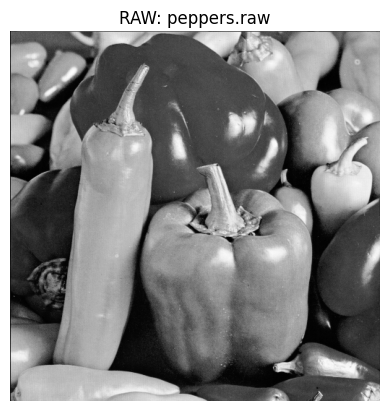

peppers.raw 中心 10x10 像素值:
 [[ 63  43  45  60  71  61  58  25   4  20]
 [ 66  50  46  42  55  40  52  34   4  26]
 [ 60  57  35  36  47  32  48  25  15  56]
 [ 86  57  33  37  23  34  25  35  66  59]
 [112  91  57  27  27  14  27  49  57  46]
 [108  69  69  39  20   9  42  73  52  46]
 [113  92  45  32  13  44  55  65  55  32]
 [131  90  59  27  33  62  72  62  59  47]
 [144  96  40  30  57  92  73  66  60  45]
 [133  72  34  61  99 112 100  97  80  48]] 



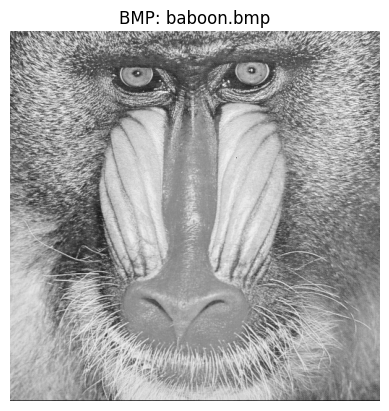

baboon.bmp 中心 10x10 像素值:
 [[152 151 154 167 155 142 139 136 139 143]
 [150 175 177 178 180 177 174 173 153 130]
 [149 165 155 155 170 174 173 171 163 159]
 [149 158 169 171 172 166 151 165 156 138]
 [164 170 177 177 180 177 172 178 170 156]
 [172 186 185 175 177 181 184 180 176 165]
 [184 183 166 168 173 170 167 176 171 171]
 [181 170 175 190 190 188 178 176 175 171]
 [183 187 186 190 189 188 176 162 158 153]
 [190 192 184 176 188 186 184 174 164 159]] 



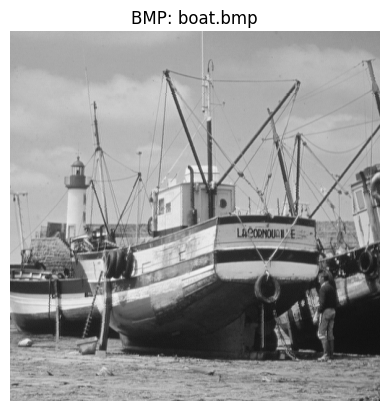

boat.bmp 中心 10x10 像素值:
 [[ 88  74 105 105  48  57  62  75 140 142]
 [ 83  71  85 101  58  50  63  65 129 143]
 [ 84  70  65  67  53  49  54  66 123 141]
 [ 82  66  56  53  45  53  55  69 127 136]
 [ 86  65  60  49  47  52  55  67 118 138]
 [ 79  71  59  50  51  50  55  72 122 133]
 [ 86  76  61  53  54  54  58  68 117 132]
 [ 89  77  61  59  52  56  55  65 116 132]
 [ 84  78  61  57  55  57  58  65 117 137]
 [ 78  77  55  58  52  56  57  68 127 136]] 



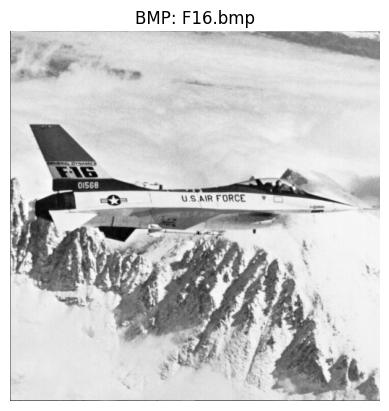

F16.bmp 中心 10x10 像素值:
 [[105 110 108 111 118 130 126 123 115 107]
 [106 109 109 114 123 131 124 117 116 107]
 [111 107 111 120 129 127 124 115 115 101]
 [110 107 116 118 123 126 119 111 113 108]
 [106 109 109 114 112 113 108 109 114 108]
 [ 99 101 102 103 104 108 109 108 109 109]
 [101 102  95 100 104 106 106 106 107 108]
 [ 94  96 102 105 108 101 102 104 108 107]
 [ 94  99 104 104 103 101 103  98 106 108]
 [101 101 101  99 104  99 104 101 104 104]] 



In [9]:
# RAW 圖片測試
raw_files = ["lena.raw", "goldhill.raw", "peppers.raw"]
for f in raw_files:
    img = read_raw(f, 512, 512)
    show_image(img, f"RAW: {f}")
    print(f"{f} 中心 10x10 像素值:\n", center_patch(img), "\n")

# BMP 圖片測試
bmp_files = ["baboon.bmp", "boat.bmp", "F16.bmp"]
for f in bmp_files:
    img = read_bmp(f)
    show_image(img, f"BMP: {f}")
    print(f"{f} 中心 10x10 像素值:\n", center_patch(img), "\n")


#Part B: Image Enhancement Toolkit

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Log Transform ----------
def log_transform(img):
    c = 255 / np.log(1 + 255)
    out = c * np.log(1 + img.astype(np.float32))
    return np.clip(out, 0, 255).astype(np.uint8)

# ---------- Gamma Transform ----------
def gamma_transform(img, gamma=0.5):
    c = 255 / (255 ** gamma)
    out = c * (img.astype(np.float32) ** gamma)
    return np.clip(out, 0, 255).astype(np.uint8)

# ---------- Negative Transform ----------
def negative_transform(img):
    return 255 - img

# ---------- 顯示結果 ----------
def show_enhancements(img, title="Original", gamma=0.5):
    fig, axs = plt.subplots(1, 5, figsize=(16, 4))
    axs[0].imshow(img, cmap="gray"); axs[0].set_title(title); axs[0].axis("off")
    axs[1].imshow(log_transform(img), cmap="gray"); axs[1].set_title("Log")
    axs[2].imshow(gamma_transform(img, gamma), cmap="gray"); axs[2].set_title(f"Gamma ({gamma})")
    axs[3].imshow(gamma_transform(img, 1/gamma), cmap="gray"); axs[3].set_title(f"Gamma ({1/gamma})")
    axs[4].imshow(negative_transform(img), cmap="gray"); axs[4].set_title("Negative")
    plt.show()


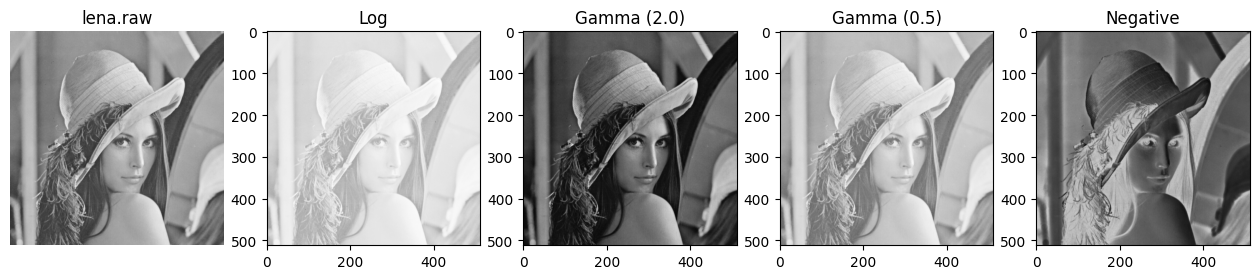

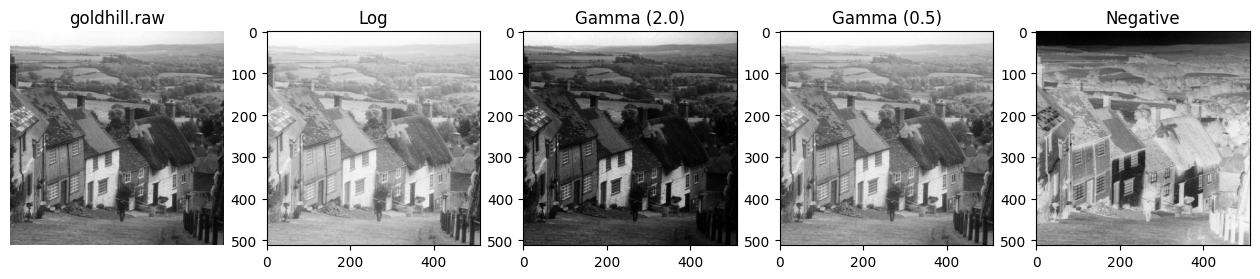

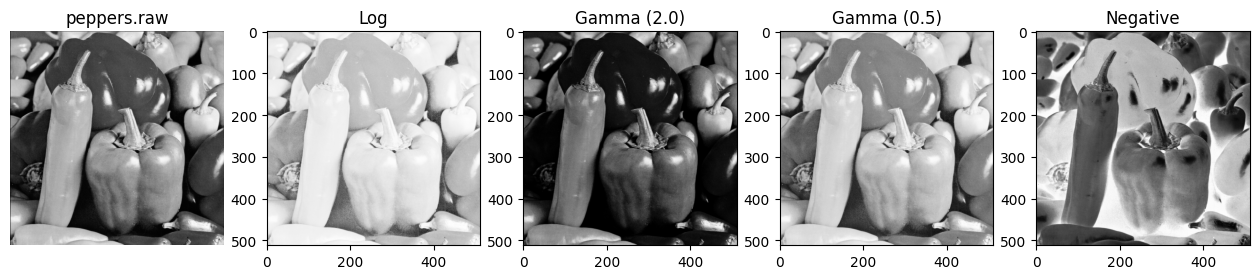

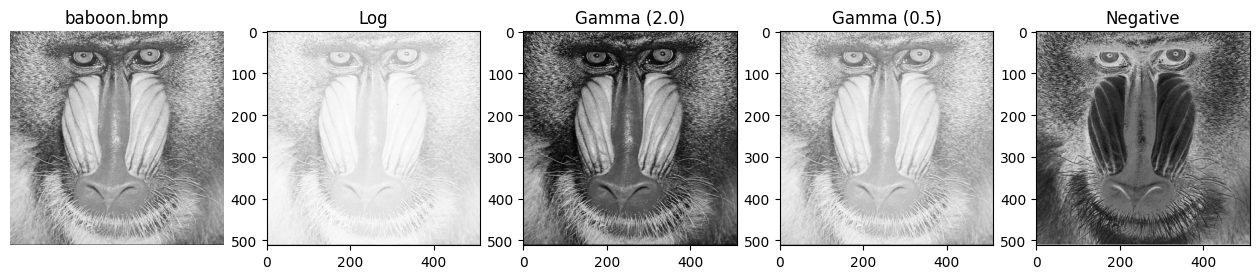

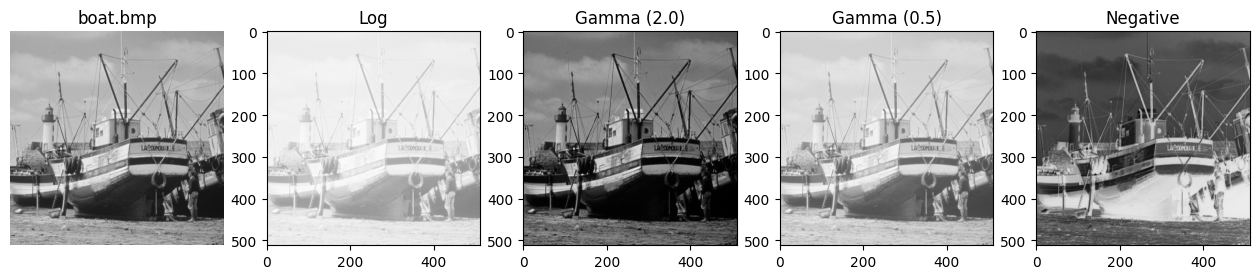

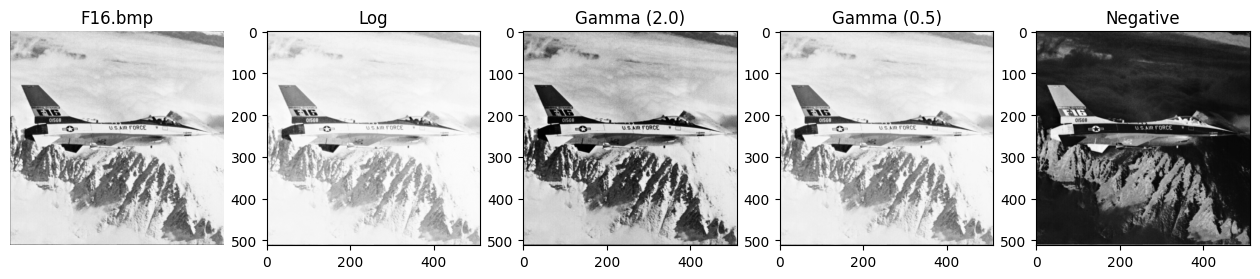

In [11]:
raw_files = ["lena.raw", "goldhill.raw", "peppers.raw"]
for f in raw_files:
  img = read_raw(f, 512, 512)  # 從 Part A 的函式
  show_enhancements(img, f, gamma=2.0)
bmp_files = ["baboon.bmp", "boat.bmp", "F16.bmp"]
for f in bmp_files:
    img = read_bmp(f)
    show_enhancements(img, f, gamma=2.0)



#Part C: Image downsampling and upsampling

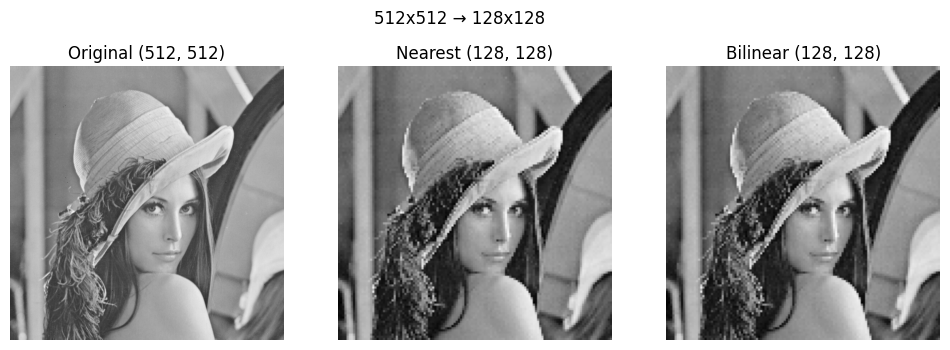

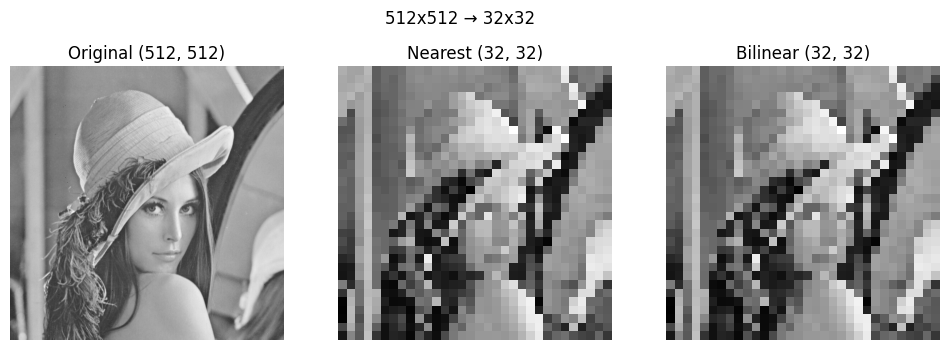

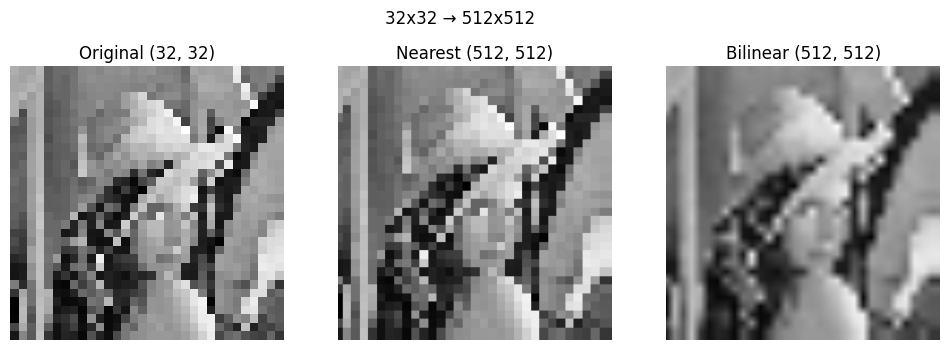

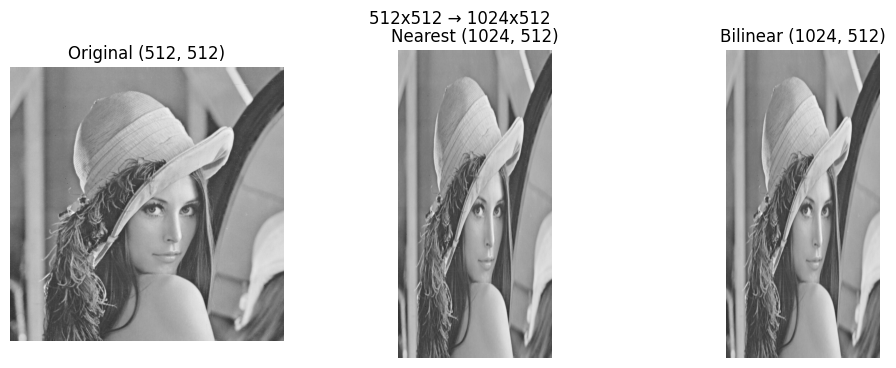

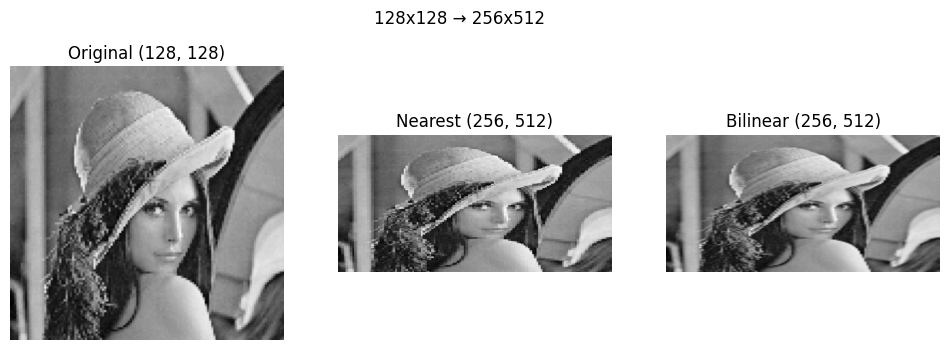

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ----------- 最近鄰插值 (Nearest Neighbor) -----------
def resize_nearest(img, new_h, new_w):
    h, w = img.shape
    out = np.zeros((new_h, new_w), dtype=img.dtype)
    scale_y, scale_x = h / new_h, w / new_w
    for y in range(new_h):
        for x in range(new_w):
            src_y = int(round(y * scale_y))
            src_x = int(round(x * scale_x))
            src_y = min(src_y, h-1)  # 邊界處理
            src_x = min(src_x, w-1)
            out[y, x] = img[src_y, src_x]
    return out

# ----------- 雙線性插值 (Bilinear Interpolation) -----------
def resize_bilinear(img, new_h, new_w):
    h, w = img.shape
    out = np.zeros((new_h, new_w), dtype=np.float32)
    scale_y, scale_x = h / new_h, w / new_w
    for y in range(new_h):
        for x in range(new_w):
            src_y = y * scale_y
            src_x = x * scale_x
            y0, x0 = int(np.floor(src_y)), int(np.floor(src_x))
            y1, x1 = min(y0+1, h-1), min(x0+1, w-1)

            dy, dx = src_y - y0, src_x - x0

            v0 = (1-dx)*img[y0, x0] + dx*img[y0, x1]
            v1 = (1-dx)*img[y1, x0] + dx*img[y1, x1]
            out[y, x] = (1-dy)*v0 + dy*v1
    return np.clip(out, 0, 255).astype(np.uint8)

# ----------- 測試函式 -----------
def compare_resize(img, new_h, new_w, title="Test"):
    nn = resize_nearest(img, new_h, new_w)
    bl = resize_bilinear(img, new_h, new_w)

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(img, cmap="gray"); axs[0].set_title(f"Original {img.shape}")
    axs[1].imshow(nn, cmap="gray"); axs[1].set_title(f"Nearest {nn.shape}")
    axs[2].imshow(bl, cmap="gray"); axs[2].set_title(f"Bilinear {bl.shape}")
    for ax in axs: ax.axis("off")
    plt.suptitle(title)
    plt.show()

# ----------- 執行 5 種測試情境 -----------
test_img = read_raw("lena.raw", 512, 512)  # 可以換成任意一張

compare_resize(test_img, 128, 128, "512x512 → 128x128")
compare_resize(test_img, 32, 32,   "512x512 → 32x32")
compare_resize(resize_nearest(test_img, 32, 32), 512, 512, "32x32 → 512x512")
compare_resize(test_img, 1024, 512, "512x512 → 1024x512")
compare_resize(resize_nearest(test_img, 128, 128), 256, 512, "128x128 → 256x512")


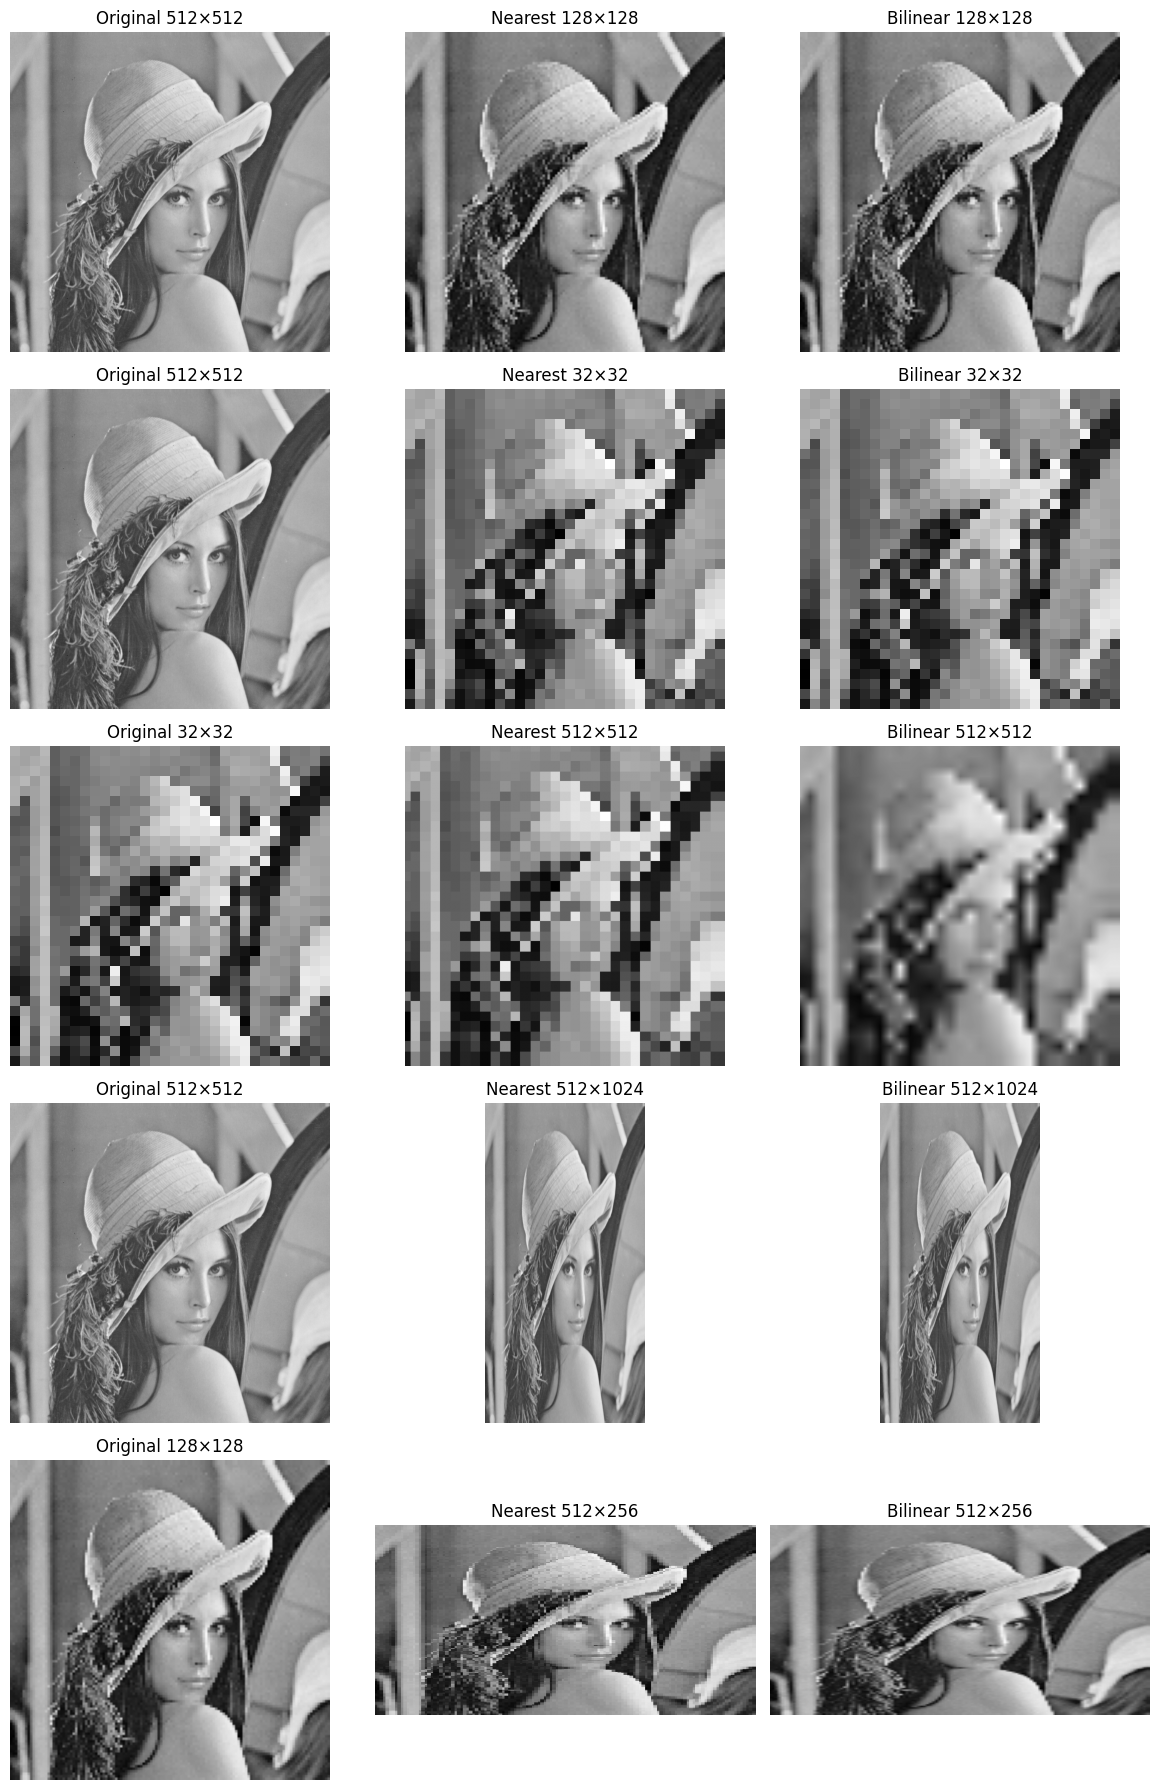

In [15]:
def show_all_cases(img):
    # 五個情境
    cases = [
        ("512→128", img, resize_nearest(img, 128, 128), resize_bilinear(img, 128, 128)),
        ("512→32",  img, resize_nearest(img, 32, 32),  resize_bilinear(img, 32, 32)),
        ("32→512", resize_nearest(img, 32, 32),
                   resize_nearest(resize_nearest(img, 32, 32), 512, 512),
                   resize_bilinear(resize_nearest(img, 32, 32), 512, 512)),
        ("512→1024×512", img, resize_nearest(img, 1024, 512), resize_bilinear(img, 1024, 512)),
        ("128→256×512", resize_nearest(img, 128, 128),
                        resize_nearest(resize_nearest(img, 128, 128), 256, 512),
                        resize_bilinear(resize_nearest(img, 128, 128), 256, 512))
    ]

    # 畫圖 (5 列 × 3 欄)
    fig, axs = plt.subplots(len(cases), 3, figsize=(12, 18))

    for i, (title, ori, nn, bl) in enumerate(cases):
        axs[i,0].imshow(ori, cmap="gray"); axs[i,0].axis("off")
        axs[i,0].set_title(f"Original {ori.shape[1]}×{ori.shape[0]}")

        axs[i,1].imshow(nn, cmap="gray"); axs[i,1].axis("off")
        axs[i,1].set_title(f"Nearest {nn.shape[1]}×{nn.shape[0]}")

        axs[i,2].imshow(bl, cmap="gray"); axs[i,2].axis("off")
        axs[i,2].set_title(f"Bilinear {bl.shape[1]}×{bl.shape[0]}")

        # 在左側標註情境
        axs[i,0].set_ylabel(title, fontsize=12, rotation=90, labelpad=10)

    plt.tight_layout()
    plt.show()

# 使用範例：一次輸出五個情境
img = read_raw("lena.raw", 512, 512)
show_all_cases(img)
